In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Titanic Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,male


In [4]:
df.shape

(195, 12)

In [5]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,156


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  195 non-null    int64  
 1   Survived     195 non-null    int64  
 2   Pclass       195 non-null    int64  
 3   Name         195 non-null    object 
 4   Age          195 non-null    float64
 5   SibSp        195 non-null    int64  
 6   Parch        195 non-null    int64  
 7   Ticket       195 non-null    object 
 8   Fare         195 non-null    float64
 9   Cabin        39 non-null     object 
 10  Embarked     195 non-null    object 
 11  Gender       195 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.4+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,195.0,98.000000,56.435804,1.00,49.50,98.000000,146.5000,195.0
Survived,195.0,0.343590,0.476129,0.00,0.00,0.000000,1.0000,1.0
Pclass,195.0,2.420513,0.797929,1.00,2.00,3.000000,3.0000,3.0
Age,195.0,27.761731,13.592439,0.83,20.00,27.761731,33.0000,71.0
SibSp,195.0,0.697436,1.310443,0.00,0.00,0.000000,1.0000,8.0
Parch,195.0,0.441026,0.879526,0.00,0.00,0.000000,1.0000,5.0
Fare,195.0,27.283887,36.078740,0.00,8.05,15.050000,30.3833,263.0


In [8]:
df.dropna(inplace = True)

In [9]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,female
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,male
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,S,female
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,S,female


In [13]:
pd.get_dummies(df['Gender']).head()

,female,male
1,True,False
3,True,False
6,False,True
10,True,False
11,True,False


In [17]:
sex = pd.get_dummies(df['Gender'], drop_first = True)
sex.head(10)

,male
1,False
3,False
6,True
10,False
11,False
21,True
23,True
27,True
31,False
52,False


In [18]:
pd.get_dummies(df['Embarked']).head()

,C,S
1,True,False
3,False,True
6,False,True
10,False,True
11,False,True


In [19]:
embarked = pd.get_dummies(df['Embarked'], drop_first = True)
embarked.head(4)

,S
1,False
3,True
6,True
10,True


In [21]:
pclass = pd.get_dummies(df['Pclass'], drop_first = False)
pclass.head(4)

,1,2,3
1,True,False,False
3,True,False,False
6,True,False,False
10,False,False,True


In [23]:
titanic = pd.concat([df, sex, pclass], axis = 1)

In [25]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,male,1,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,female,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,female,False,True,False,False
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,male,True,True,False,False
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,S,female,False,False,False,True
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,S,female,False,True,False,False


In [26]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()
zip_filename = next(iter(uploaded))

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
  zip_ref.extractall('extracted_images')
print("Files extracted")
os.listdir("extracted_images")

Saving apple.zip to apple.zip
Files extracted


['tomato1.jpg', 'tomato.jpg', 'apple.jpg', 'apple-gala.png']

In [27]:
extract_path = "extracted_images"
if not os.path.exists(extract_path):
  raise FileNotFoundError(f"Folder {extract_path} not found. Make sure it extracted properly.")
image_files = [f for f in os.listdir(extract_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
print("Image files found:", image_files)

Image files found: ['tomato1.jpg', 'tomato.jpg', 'apple.jpg', 'apple-gala.png']


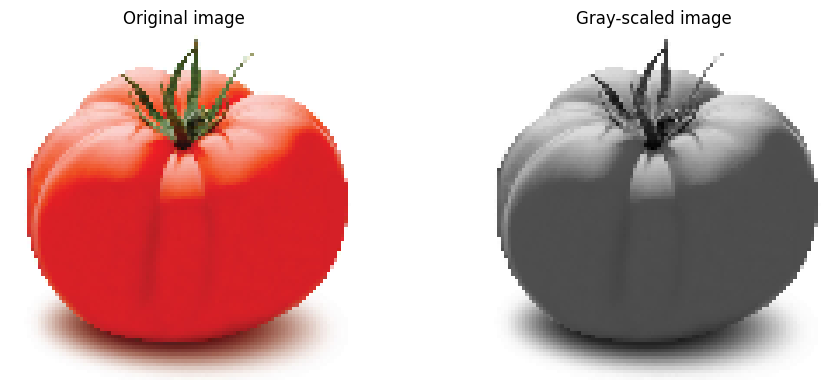

In [31]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

if len(image_files) == 0:
  raise ValueError('No images found in image_files')
image_path = os.path.join(extract_path, image_files[0])
image = cv2.imread(image_path)

if image is None:
  raise ValueError("Image could not be loaded. Please check the file format.")
image_resized = cv2.resize(image, (100,100))

gray_image = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
plt.title('Original image')
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Gray-scaled image')
plt.imshow(gray_image, cmap = 'gray')
plt.axis('off')

plt.tight_layout()
plt.show()